# Лабораторная 2
## Многомерная линейная регрессия

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

### Часть 1

Импортируем датасет и разделим данные на обучающую и тестовую выборку

In [69]:
housing = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', sep=',')
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [70]:
X = housing.drop('medv', axis=1)
y = housing['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
y_train.size

339

1. Сначала обучим модели с разным количеством опытов и сравним их качество

Для количества опытов равным 80:

In [71]:
X_80 = X_train.iloc[:80]
y_80 = y_train.iloc[:80]
model_80 = LinearRegression().fit(X_80, y_80)
y_80_pred = model_80.predict(X_test)

Для количества опытов равным 160:

In [72]:
X_160 = X_train.iloc[:160]
y_160 = y_train.iloc[:160]
model_160 = LinearRegression().fit(X_160, y_160)
y_160_pred = model_160.predict(X_test)

Для полного набора данных (339):

In [73]:
model_full = LinearRegression().fit(X_train, y_train)
y_full_pred = model_full.predict(X_test)

Оценка качества:

In [74]:
print('\nОценки качества для моделей с разным количеством опытов в данных:\n')
print('Для модели с количеством данных равных 80:\n')
print(f'MSE: {mean_squared_error(y_test, y_80_pred)}, MAE: {mean_absolute_percentage_error(y_test, y_80_pred)}, R2: {r2_score(y_test, y_80_pred)}')
print('\nДля модели с количеством данных равных 160:\n')
print(f'MSE: {mean_squared_error(y_test, y_160_pred)}, MAE: {mean_absolute_percentage_error(y_test, y_160_pred)}, R2: {r2_score(y_test, y_160_pred)}')
print('\nДля модели с полным количеством данных (339):\n')
print(f'MSE: {mean_squared_error(y_test, y_full_pred)}, MAE: {mean_absolute_percentage_error(y_test, y_full_pred)}, R2: {r2_score(y_test, y_full_pred)}')


Оценки качества для моделей с разным количеством опытов в данных:

Для модели с количеством данных равных 80:

MSE: 33.2846886738556, MAE: 0.1816666536664023, R2: 0.5871519994085763

Для модели с количеством данных равных 160:

MSE: 28.85763808450346, MAE: 0.18646258460150017, R2: 0.6420631028964312

Для модели с полным количеством данных (339):

MSE: 26.558581842040887, MAE: 0.1778099125732869, R2: 0.6705795412578767


Как видим, качество моделей заметно выросло с ростом числа опытов для обучения, что позволяет сделать вывод, 
что бывают ситуации, когда для повышения качества модели необходимо увеличить число опытов для обучения.

2. Теперь обучим модели с разным количеством признаков и сравним их качество

Для количества признаков равным 2:

In [75]:
X_2f = X_train[['age', 'dis']]
model_2f = LinearRegression().fit(X_2f, y_train)
y_2f_pred = model_2f.predict(X_test[['age', 'dis']])

Для количества признаков равным 7:

In [76]:
X_7f = X_train.iloc[:, :7]
model_7f = LinearRegression().fit(X_7f, y_train)
y_7f_pred = model_7f.predict(X_test.iloc[:, :7])

Для количества признаков равным 13 мы уже обучили, это модель ```model_full```

Оценки качества:

In [77]:
print('\nОценки качества для моделей с разным количеством признаков:\n')
print('Для модели с количеством признаков равным 2:\n')
print(f'MSE: {mean_squared_error(y_test, y_2f_pred)}, MAE: {mean_absolute_percentage_error(y_test, y_2f_pred)}, R2: {r2_score(y_test, y_2f_pred)}')
print('\nДля модели с количеством признаков равным 7:\n')
print(f'MSE: {mean_squared_error(y_test, y_7f_pred)}, MAE: {mean_absolute_percentage_error(y_test, y_7f_pred)}, R2: {r2_score(y_test, y_7f_pred)}')
print('\nДля модели с полным количеством данных (339):\n')
print(f'MSE: {mean_squared_error(y_test, y_full_pred)}, MAE: {mean_absolute_percentage_error(y_test, y_full_pred)}, R2: {r2_score(y_test, y_full_pred)}')


Оценки качества для моделей с разным количеством признаков:

Для модели с количеством признаков равным 2:

MSE: 72.38204237736556, MAE: 0.33704069351987015, R2: 0.10220636981077291

Для модели с количеством признаков равным 7:

MSE: 38.421158536990106, MAE: 0.23156359760465384, R2: 0.523441584873173

Для модели с полным количеством данных (339):

MSE: 26.558581842040887, MAE: 0.1778099125732869, R2: 0.6705795412578767


Сразу можем сказать, что в отличие от количества опытов, количетсво признаков влияет на качество моделей гораздо сильнее. 
На малом количестве опытов (80) ```MSE``` равно ```33.28```, но на малом количестве признаков (2) ```MSE``` равняется ```72.38```!

### Часть 2


Используя ```Matplotlib``` отрисуем в ```3D``` режиме данные (как точки в пространстве) и полученную 
плоскость решения модели с 2-мя признаками.

In [78]:
from mpl_toolkits.mplot3d import axes3d

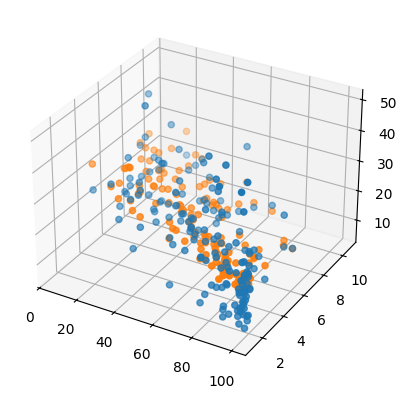

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['age'], X_test['dis'], y_test)
ax.scatter(X_test['age'], X_test['dis'], y_2f_pred, 'r')